# 4주 1강: Data presentation, Histogram

Allen B. Downey의 http://thinkstats2.com 코드를 참조했습니다.

이번 강의는 데이터를 보여주는 가장 기본적인 방법에 대해서 이야기해보겠습니다.

값들이 들어있는 리스트가 있을 때, 각 성분의 수를 재는 방법은 다양합니다.
몇 가지 방법을 소개하고 비교해 보겠습니다.

원 교과서 예제 코드의 thinkstats2 package를 사용하지 않고, 다시 자체 구현하겠습니다.
교과서 코드는 교과서 github에 있으니 그것도 따로 보시면 좋습니다.

In [1]:
values = [5,5,3,1,1,2,1,2,1,3,3,4,5,5]

가장 직관적인 방법은 Python의 내장 for문과 dictionary입니다.

In [2]:
hist = {}
for x in values:
    hist[x] = hist.get(x, 0) + 1
hist

{5: 4, 3: 3, 1: 4, 2: 2, 4: 1}

Python 표준 라이브러리 중 `collections` 모듈이 있습니다 (python >= 2.7)
이 중 `Counter`라는 함수를 쓸 수 있습니다.

In [3]:
from collections import Counter
counter = Counter(values)
counter

Counter({5: 4, 3: 3, 1: 4, 2: 2, 4: 1})

Python 표준 라이브러리 중 `itertools` 모듈의 `groupby` 함수를 쓰는 방법도 있습니다.
아래의 점들을 잊으면 안됩니다.

1. groupby는 정렬한 상태로 써야 합니다.
2. groupby는 값이 아니라 iterator를 반환합니다.

In [4]:
from itertools import groupby
{key: len(list(group)) for key, group in groupby(sorted(values))}

{1: 4, 2: 2, 3: 3, 4: 1, 5: 4}

In [5]:
import numpy as np
hist = {key: val for key, val in enumerate(np.bincount(values))}

In [6]:
# 속도테스트를 한 번 해 보죠.
import random
import time
long_values = [random.uniform(1, 10) for _ in range(10000000)]

start = time.time()
hist = {}
for x in long_values:
    hist[x] = hist.get(x, 0) + 1
print("For loop: ", time.time() - start)

start = time.time()
counter = Counter(long_values)
print("collections.Counter: ", time.time() - start)

start = time.time()
hist = {key: len(list(group)) for key, group in groupby(sorted(long_values))}
print("itertools.groupby: ", time.time() - start)

sorted_long_values = sorted(long_values)
start = time.time()
hist = {key: len(list(group)) for key, group in groupby(sorted_long_values)}
print("itertools.groupby sorted values: ", time.time() - start)

start = time.time()
hist = {key: val for key, val in enumerate(np.bincount(long_values))}
print("numpy bincount: ", time.time() - start)

For loop:  7.731526851654053
collections.Counter:  4.6534905433654785
itertools.groupby:  14.379810571670532
itertools.groupby sorted values:  10.735157251358032
numpy bincount:  0.7102909088134766


당연히 dictionary니까 key값으로 조회 가능합니다. 

In [7]:
hist[5]

1111036

The `keys` 를 조회하면 value count의 x축이 나옵니다:

In [8]:
hist.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

dict의 iteration은 keys()혹은 items()를 통해서 할 수 있습니다.

In [9]:
for key in sorted(hist.keys()):
    print(key, hist[key])

0 0
1 1111635
2 1112349
3 1111822
4 1110538
5 1111036
6 1113021
7 1110227
8 1108020
9 1111352


In [10]:
long_values = [random.uniform(1, 10) for _ in range(100)] 
hist = {key: val for key, val in enumerate(np.bincount(long_values)) if val != 0}

In [11]:
print(hist.items())
for key, val in sorted(hist.items()):
    print(key, val)

dict_items([(1, 11), (2, 6), (3, 20), (4, 7), (5, 13), (6, 11), (7, 6), (8, 14), (9, 12)])
1 11
2 6
3 20
4 7
5 13
6 11
7 6
8 14
9 12


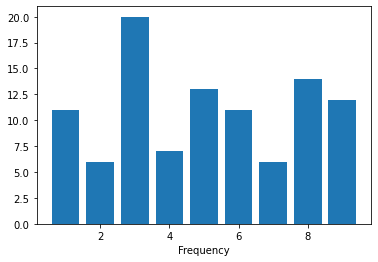

In [12]:
from matplotlib import pyplot as plt
plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

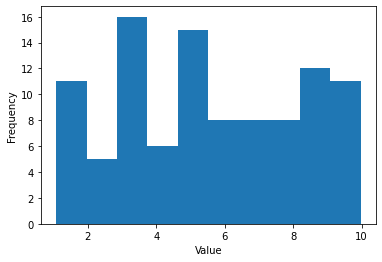

In [13]:
from matplotlib import pyplot as plt
plt.hist(long_values)
#plt.hist(long_values, bins = range(1, 11), rwidth = 0.8) # bins를 조정해보세요
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

교과서 예제 파일을 가져와서 실제 데이터를 그려봅시다

preg.outcome이 1인 아이들에 대한 정보만 가져와 봅시다 (출산시 생존)

In [14]:
import pandas as pd
preg = pd.read_csv("./2002FemPreg.tsv", sep = "\t")
live = preg[preg.outcome == 1]

탄생 시의 파운드 무게 (birthwgt_lb) 를 hisogram으로 그려봅시다. 

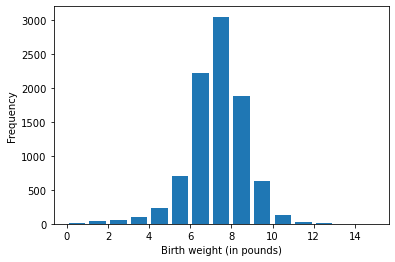

In [15]:
hist = plt.hist(live["birthwgt_lb"], rwidth=0.8, label="birthwgt_lb",
                bins=range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max()+1)))
plt.xlabel("Birth weight (in pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

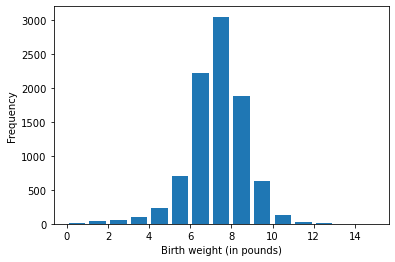

In [16]:
hist = live["birthwgt_lb"].plot.hist(rwidth=0.8, 
                                     bins=range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max()+1)))
plt.xlabel("Birth weight (in pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

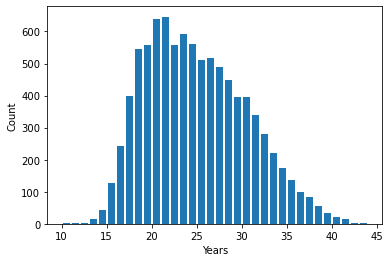

In [17]:
hist = live["agepreg"].plot.hist(rwidth=0.8,
                                 bins=range(int(live["agepreg"].min()), int(live["agepreg"].max()+1)))
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()
#hist = thinkstats2.Hist(ages, label='agepreg')
#thinkplot.Hist(hist)
#thinkplot.Config(xlabel='years', ylabel='Count')

연습을 위해서 임신 기간에 대한 histogram을 그려보세요 (column `prglngth`).

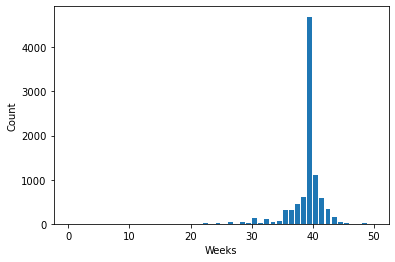

In [18]:
# Solution goes here
hist = live["prglngth"].plot.hist(rwidth=0.8,
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.show()

가장 작은 값 10개와 그 빈도를 추출해봅시다.

In [19]:
live.groupby("prglngth").count()["caseid"].sort_index()[0:10]

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: caseid, dtype: int64

가장 큰 값 10개와 그 빈도를 추출해봅시다

In [20]:
# Solution goes here
live.groupby("prglngth").count()["caseid"].sort_index(ascending=False)[0:10]

prglngth
50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
Name: caseid, dtype: int64

첫 번째 아이와 나머지 아이를 구분해서 그림을 그려봅시다. `birthord`는 이 아이가 몇 번째 아이인지를 나타내 줍니다.

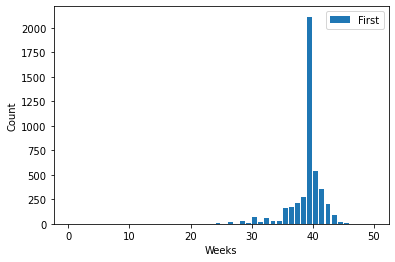

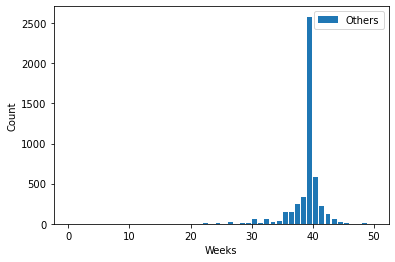

In [21]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
hist = firsts["prglngth"].plot.hist(rwidth=0.8, label="First",
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

hist = others["prglngth"].plot.hist(rwidth=0.8, label="Others",
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

두 개를 한 번에 그려봅시다.

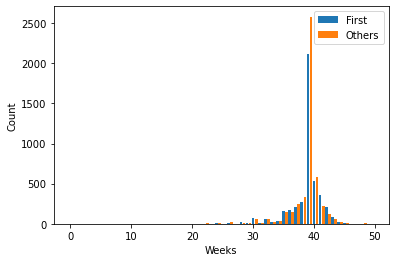

In [22]:
hist = firsts["prglngth"].plot.hist(rwidth=0.45, label="First", align="left",
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
hist2 = others["prglngth"].plot.hist(rwidth=0.45, label="Others", align="mid", 
                                 bins=range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))

plt.xlabel("Weeks")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

`Series` 는 다양한 요약 통계 방법들을 제공합니다.

In [23]:
mean = live.prglngth.mean()
median = live.prglngth.median()
var = live.prglngth.var()
std = live.prglngth.std()

평균(mean)과 표준편차를 출력해 봅시다

In [24]:
mean, std

(38.56055968517709, 2.702343810070593)

연습삼아서 표준편차가 분산의 루트값이라는 사실을 확인해봅시다

In [25]:
# Solution goes here
var ** 0.5, std

(2.702343810070593, 2.702343810070593)

지난주에 이미 한 것이지만, 첫 아이의 임신기간과 그 이후 아이들의 임신기간을 비교해봅시다.

In [26]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

차이는 아래와 같습니다.

In [27]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

Cohen effect size는 두 집단의 평균 차이를 표준편차로 비교하는 방법입니다. 

$d = \frac{<x_1> - <x_2>}{s}$

와 같이 씁니다. 여기서 $<x_1>$, $<x_2>$는 각 집단의 평균이고, $s$는 합동 표준편차 (pooled standard deviation)이며 아래와 같이 계산합니다. 

$s = \frac{n_1 \times \sigma^2_{x_1} - n_2 \times \sigma^2_{x_2}}{n_1 + n_2}$

여기서 $\sigma^2$은 분산, n은 각 집단의 크기입니다.

In [28]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

위의 차이가 얼마나 의미가 있는지 첫 아이와 그 이후 아이의 임신기간 차이에 대한 Cohen effect size를 계산해봅시다. 

In [29]:
# Solution goes here
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

최빈값(mode)과 그 count를 구해봅시다.

In [30]:
firsts.prglngth.mode(), firsts.prglngth.value_counts()[firsts.prglngth.mode()]

(0    39
 dtype: int64,
 39    2114
 Name: prglngth, dtype: int64)

그다지 크지 않습니다. 유의미한 차이가 아닐 가능성이 높다는 것이지요.
이번에는 임신 기간의 pie chart를 그려봅시다

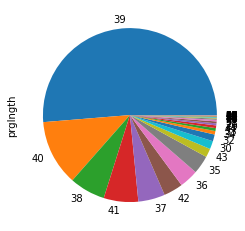

In [31]:
# Solution goes here
plt.rcParams['figure.facecolor'] = 'white'
live["prglngth"].value_counts().plot.pie()
#plt.xlabel("Income code")
#plt.ylabel("Frequency")
plt.show()
plt.close()

## Exercises

`totalwgt_lb`를 통해서 첫 아이와 다른 아이들의 무게 차이에 대해서 분석해보세요

일단 두 집단의 평균 차이를 구해보세요.

그 다음에 두 집단의 차이를 CohenEffectSize를 통해 분석해 봅시다

In [32]:
# Solution goes here

In [33]:
# Solution goes here

다음 문제를 위해서는 답변서 파일을 로드해봅시다.

In [34]:
resp = pd.read_csv("./2002FemResp.tsv", sep="\t")

<tt>totincr</tt>은 답변자 가구의 총 소득을 나타냅니다. Histogram을 그려봅시다.

[codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543) 을 보시면 각 구간의 의미가 나와있습니다

In [35]:
# Solution goes here

<tt>age_r</tt>의 histogram을 그려봅시다. 답변자의 인터뷰 당시 나이를 나타냅니다

In [36]:
# Solution goes here

<tt>numfmhh</tt>의 histogram을 그려봅시다. 답변자의 가족 수를 나타냅니다.

In [37]:
# Solution goes here

<tt>parity</tt>의 histogram을 그려봅시다. 답변자의 아이 수를 나타냅니다. 이 분포를 어떻게 이해할 수 있을까요?

In [38]:
# Solution goes here

<tt>parity</tt>의 가장 큰 값을 찾아봅시다. outlier의 의미는 무엇일까요?

In [39]:
# Solution goes here

아래의 가설에 대해서 이야기 해 봅시다. 소득이 높은 사람이 더 아이를 많이 낳는다는 이야기가 있습니다. 이 자료가 절대적인 자료가 아니고, 서로 다른 나이 (위의 age_r 분포를 보시면 알 것입니다)의 서로 다른 답변자들에 대한 통계를 다루므로 정답이란 없습니다. 다양한 통계 지표를 보면서 확인해보죠. <tt>totincr</tt> level 14의 고소득 답변자와 기타 답변자들의 답변이 어떻게 다른지 알아봅시다 (<tt>parity</tt>).

In [40]:
# Solution goes here

고소득 답변자 중 가장 아이를 많이 낳은 경우를 확인해봅시다

In [41]:
# Solution goes here

두 집단의 <tt>parity<\tt> 평균을 비교해 봅시다

In [42]:
# Solution goes here

Cohen effect size를 재 봅시다

In [43]:
# Solution goes here